In [2]:
#from google.colab import drive

#drive.mount("/content/drive/")

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3"

In [4]:
#cd /content/drive/MyDrive/Neurips23/Integrating-Spatial-Transform-Networks-with-PaDim-Architecture/
%cd ~/Neurips23/Integrating-Spatial-Transform-Networks-with-PaDim-Architecture

/home/cc/Neurips23/Integrating-Spatial-Transform-Networks-with-PaDim-Architecture


In [4]:
#!tar -xvf ../mvtec_anomaly_detection.tar.xz -C data/

    function ClickConnect(){
      console.log('Working');
      document.querySelector('colab-toolbar-button#toolbar-add-text').click();
    }
    intervalTiming = setInterval(ClickConnect, 600000);



    function ClickConnect() {
      console.log('Working')
      document
        .querySelector('#top-toolbar > colab-connect-button')
        .shadowRoot.querySelector('#connect')
        .click()
    }
    intervalTiming = setInterval(ClickConnect, 600000);


In [5]:
import sys
import os
import numpy as np
sys.path.insert(1, '../')


from src.padim_model import train as padim_train
from src.stn_model import train as stn_train
from src import utils


CLASS_NAMES = ['bottle', 'cable', 'capsule', 'carpet', 'grid',
               'hazelnut', 'leather', 'metal_nut', 'pill', 'screw',
               'tile', 'toothbrush', 'transistor', 'wood', 'zipper']

%load_ext autoreload
%autoreload 2

In [6]:
!ls

'Enhancing Anomaly_Detection_with_Spatial_Transform_Networks (2).pdf'
 LICENSE
 README.md
 data
 materials
 notebooks
 requirements.txt
 results
 src
 wandb


In [7]:
utils.set_seed()

In [8]:
import torch
torch.cuda.is_available()

True

In [9]:
import torch
import gc
gc.collect() 
torch.cuda.empty_cache()

        Epoch 1: 100%|██████████| 15/15 [03:47<00:00, 15.18s/batch, loss=0.558, ms_ssim=0.604, ssim=0.495]
        Epoch 1, Loss: 0.600, SSIM: 0.429, MS-SSIM: 0.537
        Final Loss: 0.600
        Validation: 100%|██████████| 3/3 [00:40<00:00, 13.55s

In [10]:
#stn_model,train_loader = stn_train.start(data_dir ='data',
#                      batch_size = 64,
#                      learning_rate = 0.0005,num_epochs = 20)

In [11]:
11236/4

2809.0

In [13]:
#stn_train.save_model(stn_model,model_name='results/checkpoint_best_model_mse.pth')

In [14]:
from src.stn_model.model import SpatialTransformerNetwork
import torch
from torch import Tensor, nn

stn_model = SpatialTransformerNetwork()
stn_model = nn.DataParallel(stn_model)
stn_model.to("cuda")


DataParallel(
  (module): SpatialTransformerNetwork(
    (localization): Sequential(
      (0): Conv2d(3, 8, kernel_size=(7, 7), stride=(1, 1))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU(inplace=True)
      (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): ReLU(inplace=True)
    )
    (fc_loc): Sequential(
      (0): Linear(in_features=27040, out_features=32, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=32, out_features=6, bias=True)
    )
  )
)

In [17]:
#stn_model_loaded = stn_train.load_model(stn_model,model_name='results/checkpoint_best_model_mse.pth')
checkpoint = torch.load("results/checkpoint_best_model_mse.pth") 

#model = checkpoint["model"]
stn_model.load_state_dict(checkpoint["model_state_dict"])

stn_model.to("cuda")
stn_model.eval()

DataParallel(
  (module): SpatialTransformerNetwork(
    (localization): Sequential(
      (0): Conv2d(3, 8, kernel_size=(7, 7), stride=(1, 1))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU(inplace=True)
      (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): ReLU(inplace=True)
    )
    (fc_loc): Sequential(
      (0): Linear(in_features=27040, out_features=32, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=32, out_features=6, bias=True)
    )
  )
)

In [23]:
#!sudo apt install tree

In [19]:
"""! tree -L 3 data/

data/
├── bottle
│   ├── ground_truth
│   │   ├── broken_large
│   │   ├── broken_small
│   │   └── contamination
│   ├── license.txt
│   ├── readme.txt
│   ├── test
│   │   ├── broken_large
│   │   ├── broken_small
│   │   ├── contamination
│   │   └── good
│   └── train
│       └── good

"""

'! tree -L 3 data/\n\ndata/\n├── bottle\n│   ├── ground_truth\n│   │   ├── broken_large\n│   │   ├── broken_small\n│   │   └── contamination\n│   ├── license.txt\n│   ├── readme.txt\n│   ├── test\n│   │   ├── broken_large\n│   │   ├── broken_small\n│   │   ├── contamination\n│   │   └── good\n│   └── train\n│       └── good\n\n'

In [20]:
!ls data/bottle/test/broken_large/

000.png  003.png  006.png  009.png  012.png  015.png  018.png
001.png  004.png  007.png  010.png  013.png  016.png  019.png
002.png  005.png  008.png  011.png  014.png  017.png


In [21]:
#stn_model_loaded.module.stn

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


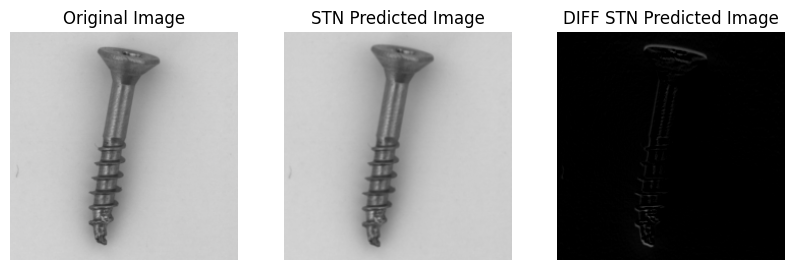

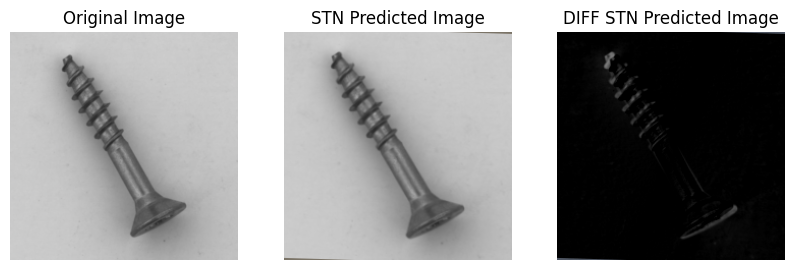

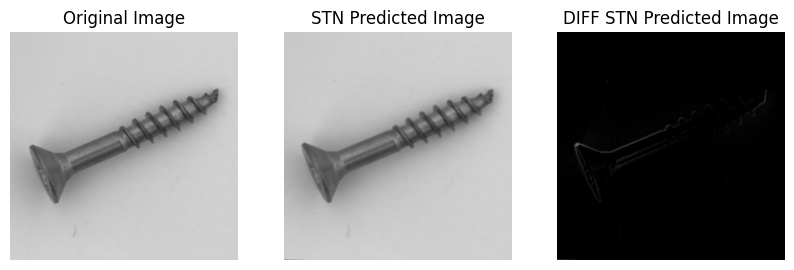

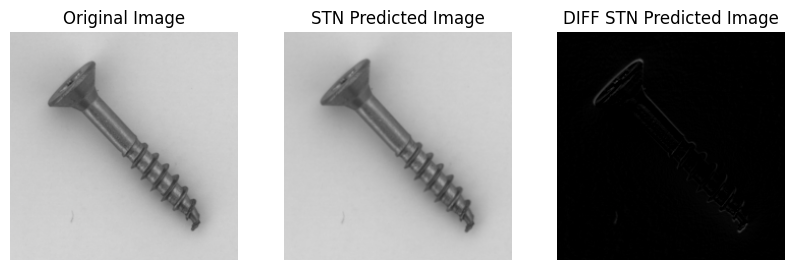

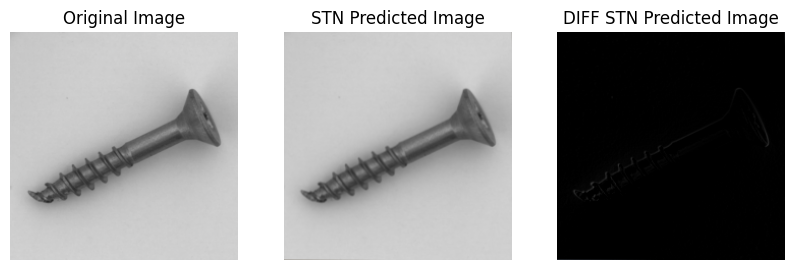

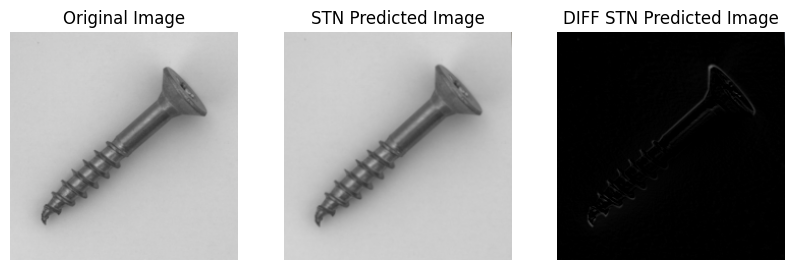

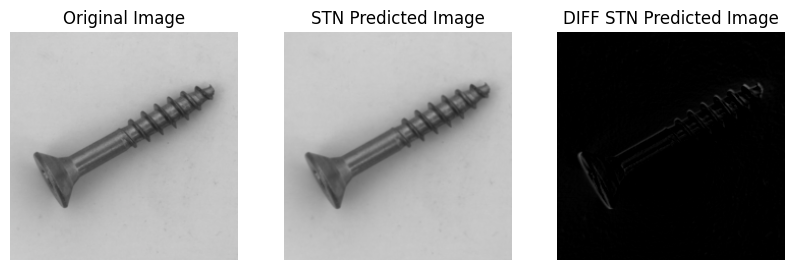

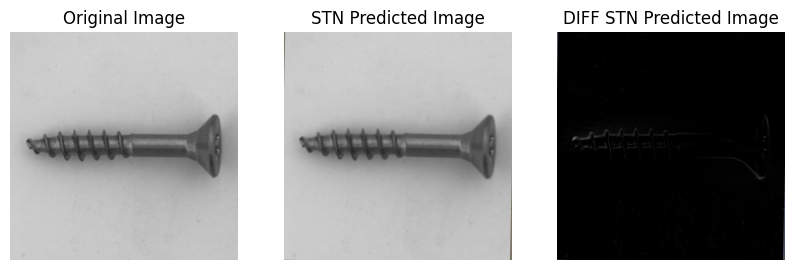

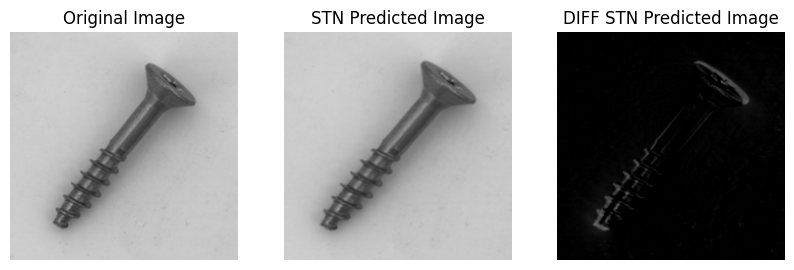

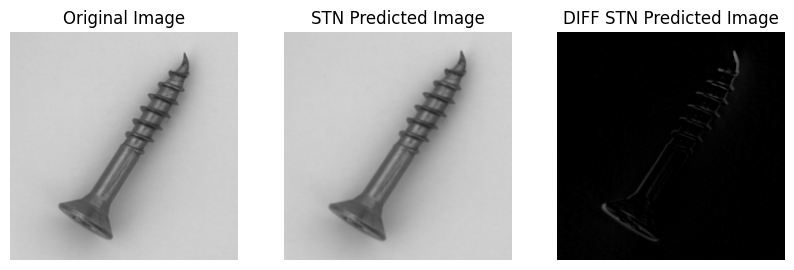

In [27]:
import torch
import numpy as np
from torchvision import transforms
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader



train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize and crop the image to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                  std=[0.229, 0.224, 0.225])

])

import glob

#img_paths = glob.glob("data/bottle/train/good/*.png")
#img_paths = glob.glob("data/screw/test/scratch_head/*.png")
#img_paths = glob.glob("data/screw/test/thread_side/*.png")
img_paths = glob.glob("data/screw/test/manipulated_front/*.png")

#img_paths = glob.glob("data/bottle/test/broken_large/*.png")

for img_path_1 in img_paths[:10]:
  image_1 = Image.open(img_path_1).convert("RGB")

  image_1 = train_transform(image_1)
  imgs = [image_1]
  inputs = torch.stack(imgs).cuda()
  with torch.no_grad():
    stn_predicted = stn_model(inputs)

  # Convert tensors to numpy arrays for visualization
  orig_image = inputs[0].cpu().numpy().transpose((1, 2, 0))
  stn_predicted_image = stn_predicted[0].cpu().numpy().transpose((1, 2, 0))

  import matplotlib.pyplot as plt

  # Undo normalization to display images correctly
  orig_image = (orig_image * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]
  #orig_image = np.clip(orig_image, 0, 1)

  stn_predicted_image = (stn_predicted_image * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]
  #stn_predicted_image = np.clip(stn_predicted_image, 0, 1)

  # Plot the images side by side
  fig, axes = plt.subplots(1, 3, figsize=(10, 5))
  axes[0].imshow(orig_image)
  axes[0].set_title('Original Image')
  axes[0].axis('off')

  axes[1].imshow(stn_predicted_image)
  axes[1].set_title('STN Predicted Image')
  axes[1].axis('off')

  axes[2].imshow(orig_image-stn_predicted_image)
  axes[2].set_title('DIFF STN Predicted Image')
  axes[2].axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

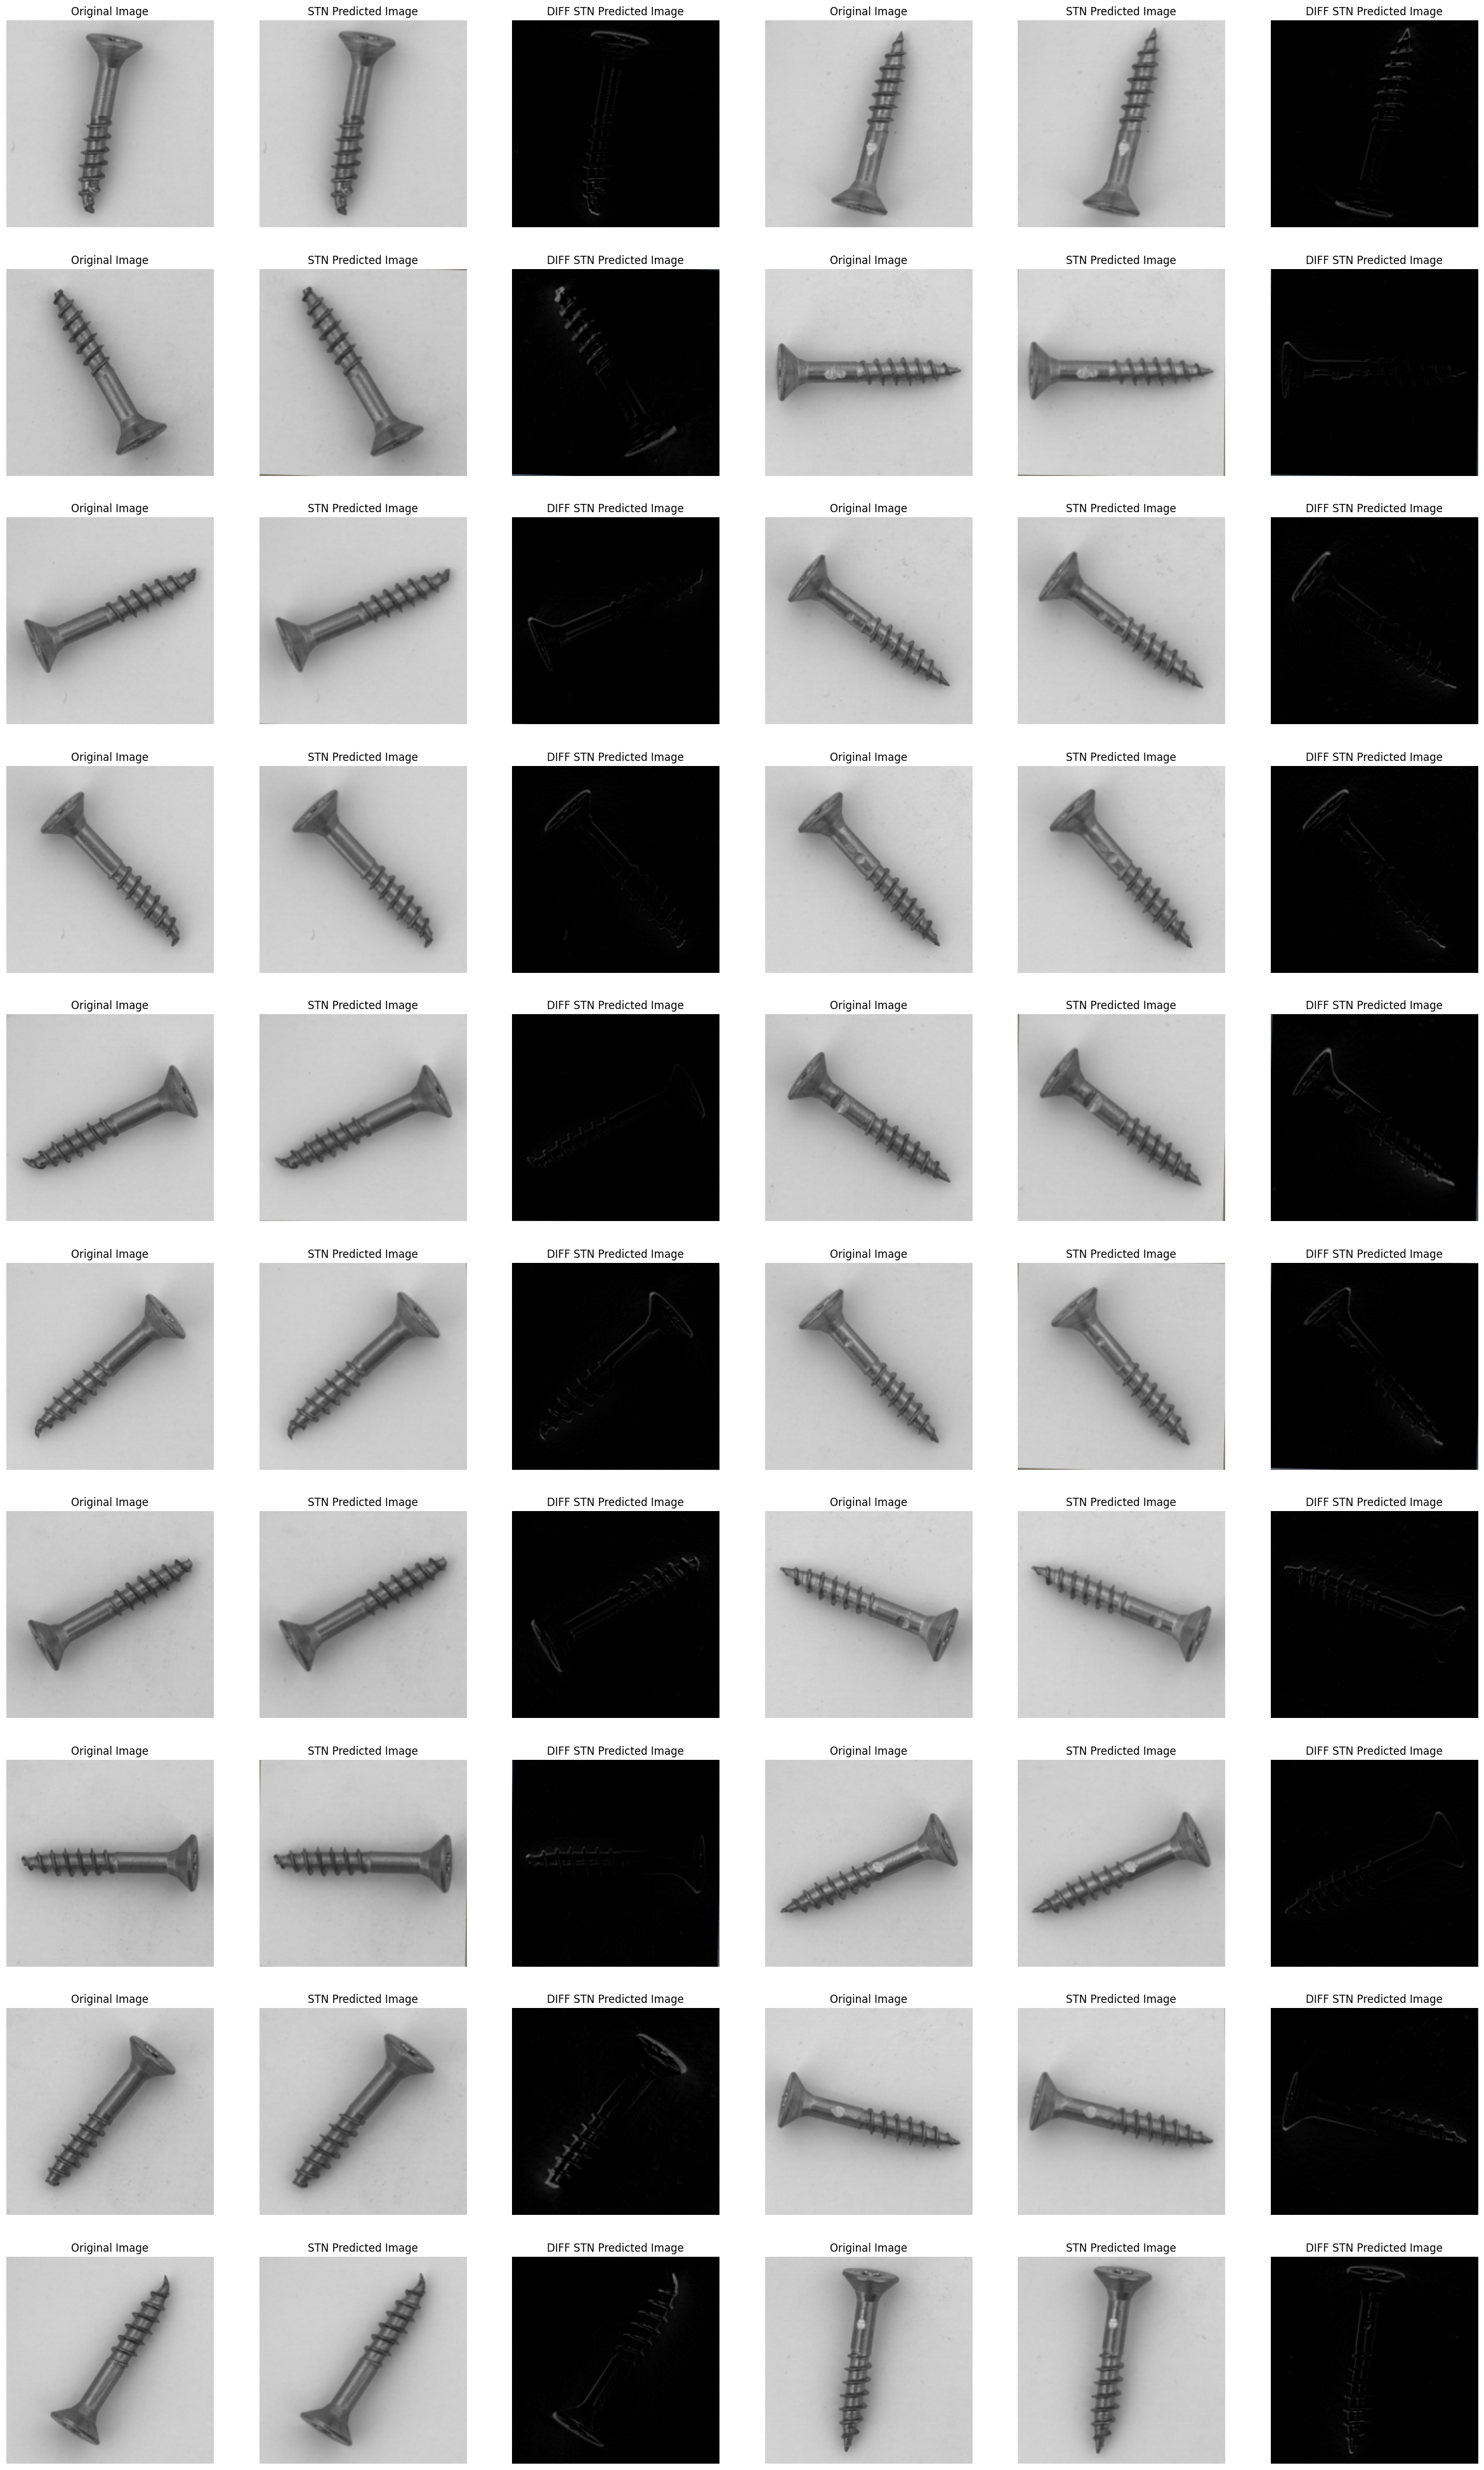

In [31]:
import torch
import numpy as np
from torchvision import transforms
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import glob
import matplotlib.pyplot as plt
import wandb

# Define tu modelo STN aquí
# stn_model = ...

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Inicializa WandB
#wandb.init(project='your_project_name', name='image_visualization')

# Definir una función para cargar y preprocesar imágenes
def load_and_preprocess_image(stn_model,img_path):
    image = Image.open(img_path).convert("RGB")
    image = train_transform(image)
    imgs = [image]
    inputs = torch.stack(imgs).cuda()
    with torch.no_grad():
        stn_predicted = stn_model(inputs)
    orig_image = inputs[0].cpu().numpy().transpose((1, 2, 0))
    stn_predicted_image = stn_predicted[0].cpu().numpy().transpose((1, 2, 0))
    orig_image = (orig_image * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]
    stn_predicted_image = (stn_predicted_image * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]
    return orig_image, stn_predicted_image, orig_image - stn_predicted_image

# Obtén las rutas de las imágenes
img_paths_1 = glob.glob("data/screw/test/manipulated_front/*.png")[:10]
img_paths_2 = glob.glob("data/screw/test/scratch_neck/*.png")[-10:]

# Crea una figura para colocar las imágenes
fig, axes = plt.subplots(len(img_paths_1), 6, figsize=(30, 5 * len(img_paths_1)))

for i, img_path in enumerate(img_paths_1):
    orig_image, stn_predicted_image, diff_image = load_and_preprocess_image(stn_model,img_paths_1[i])

    # Plot the images side by side
    axes[i, 0].imshow(orig_image)
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(stn_predicted_image)
    axes[i, 1].set_title('STN Predicted Image')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(diff_image)
    axes[i, 2].set_title('DIFF STN Predicted Image')
    axes[i, 2].axis('off')

    orig_image, stn_predicted_image, diff_image = load_and_preprocess_image(stn_model,img_paths_2[i])

    # Plot the images side by side
    axes[i, 3].imshow(orig_image)
    axes[i, 3].set_title('Original Image')
    axes[i, 3].axis('off')

    axes[i, 4].imshow(stn_predicted_image)
    axes[i, 4].set_title('STN Predicted Image')
    axes[i, 4].axis('off')

    axes[i, 5].imshow(diff_image)
    axes[i, 5].set_title('DIFF STN Predicted Image')
    axes[i, 5].axis('off')

# Guarda la figura y la envía a WandB
wandb.log({"image_visualization": wandb.Image(plt)})


In [ ]:
plt.imshow(stn_predicted_image-orig_image)
plt.show()

In [ ]:
np.sum(stn_predicted_image-orig_image)*255

In [ ]:
np.std(stn_predicted_image-orig_image)

1.2246370421306836e-06

In [ ]:
!ls

 apex
 data
'Enhancing Anomaly_Detection_with_Spatial_Transform_Networks (2).pdf'
 LICENSE
 materials
 notebooks
 README.md
 results
 src
 tsne_dark_efficientnet-b0.png
 tsne_dark_efficientnetv2_rw_m.png
 tsne_dark.png
 tsne_dark_resnet50.a1_in1k.png
 tsne_dark_resnext50_32x4d.png
 tsne_dark_tf_efficientnet_b5.png
 tsne_dark_vit_base_patch16_224.png
 tsne_train.png
 X_train_efficientnetv2_rw_m.npy
 X_train_resnet50.a1_in1k.npy
 X_train_resnext50_32x4d.npy
 X_train_tf_efficientnet_b5.npy
 X_train_tsne_resnet50.a1_in1k.npy
 X_train_tsne_resnext50_32x4d.npy
 X_train_tsne_tf_efficientnet_b5.npy
 X_train_tsne_vit_base_patch16_224.npy
 X_train_vit_base_patch16_224.npy
 y_train_resnet50.a1_in1k.npy
 y_train_resnext50_32x4d.npy
 y_train_tf_efficientnet_b5.npy
 y_train_vit_base_patch16_224.npy


    cd ano-synth
    !git config --global user.email "mecatronico.lazo@gmail.com"
    !git config --global user.name "CristianLazoQuispe"
    #!git push https://<GITHUB_ACCESS_TOKEN>@github.com/<GITHUB_USERNAME>/<REPOSITORY_NAME>.git
    #
    #!git push https://GITHUB_ACCESS_TOKEN@github.com/CristianLazoQuispe/ano-synth.git

In [ ]:
!mv *.png ../datos_procesados/

In [ ]:
!sudo apt-get install nano

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  hunspell
The following NEW packages will be installed:
  nano
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 280 kB of archives.
After this operation, 881 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 nano amd64 6.2-1 [280 kB]
Fetched 280 kB in 1s (316 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package nano.
(Reading database ... 120907 files and directo